# Inducing inputs and Cloaking

Uses dataset: Females in the !Kung

Can I combined inducing inputs and cloaking

- use the alternative covariance matrix provided by the use of inducing inputs
- how to select inducing inputs (does picking cluster centroids do a good enough job?)

In [32]:
import dp4gp_datasets
import dp4gp
import random
import numpy as np
import GPy
import matplotlib.pyplot as plt
import dp4gp_histogram
import pandas as pd
%matplotlib inline

kung = dp4gp_datasets.load_kung()

X = kung[kung[:,3]==0,2:3]
y = kung[kung[:,3]==0,0:1]
sens = 100.0
epsilon = 1.0
delta = 0.01

middley = (np.max(y)+np.min(y))/2
y[y>middley+sens/2] = middley+sens/2
y[y<middley-sens/2] = middley-sens/2

#ysub = np.mean(y)
ysub = (max(y)+min(y))/2.0
y = y - ysub


ys_std = np.std(y)
y = y / ys_std
ac_sens = sens/ys_std

(100, 287)
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Stopped before convergence
(3.8846795501345945, 3.2552472614374586, array([[ 1.01746694]]), 1.0, -0.0)
0
[   0.     1.8    3.6    5.4    7.2    9.    10.8   12.6   14.4   16.2
   18.    19.8   21.6   23.4   25.2   27.    28.8   30.6   32.4   34.2
   36.    37.8   39.6   41.4   43.2   45.    46.8   48.6   50.4   52.2
   54.    55.8   57.6   59.4   61.2   63.    64.8   66.6   68.4   70.2
   72.    73.8   75.6   77.4   79.2   81.    82.8   84.6   86.4   88.2
   90.    91.8   93.6   95.4   97.2   99.   100.8  102.6  104.4  106.2
  108.   109.8  111.6  113.4  115.2  117.   118.8  120.6  122.4  124.2
  126.   127.8  129.6  131.4  133.2  135.   136.8  138.6  140.4  142.2
  144.   145.8  147.6  149.4  151.2  153.   154.8  156.6  158.4  160.2
  162.   163.8  165.6  167.4  169.2  171.  

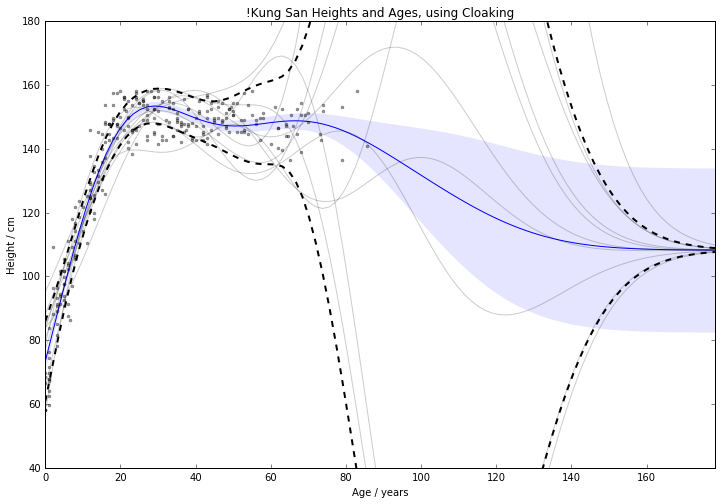

In [33]:


kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
#model = GPy.models.GPRegression(X,y,kern,normalizer=None)
model = GPy.models.GPRegression(X,y,kern,normalizer=None)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_cloaking(model,ac_sens,epsilon,delta)
Xtest = np.arange(-40,140,3)[:,None]

#plt.figure(figsize=[10,4]) #original
plt.figure(figsize=[12,8])
plt.ylim([40,180])
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:180},Nits=100,ys_mean=ysub,ys_std=ys_std,confidencescale=[1.0])
plt.savefig('noinducing_cloaking.pdf')
plt.xlabel('Age / years')
plt.ylabel('Height / cm')
plt.title('!Kung San Heights and Ages, using Cloaking')

[[  0.]
 [ 20.]
 [ 40.]
 [ 60.]]
(100, 287)
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Stopped before convergence
(3.8846795501345945, 3.2552472614374586, array([[ 1.59106361]]), 1.0, 0.0)
0
[   0.     1.8    3.6    5.4    7.2    9.    10.8   12.6   14.4   16.2
   18.    19.8   21.6   23.4   25.2   27.    28.8   30.6   32.4   34.2
   36.    37.8   39.6   41.4   43.2   45.    46.8   48.6   50.4   52.2
   54.    55.8   57.6   59.4   61.2   63.    64.8   66.6   68.4   70.2
   72.    73.8   75.6   77.4   79.2   81.    82.8   84.6   86.4   88.2
   90.    91.8   93.6   95.4   97.2   99.   100.8  102.6  104.4  106.2
  108.   109.8  111.6  113.4  115.2  117.   118.8  120.6  122.4  124.2
  126.   127.8  129.6  131.4  133.2  135.   136.8  138.6  140.4  142.2
  144.   145.8  147.6  149.4  151.2  153.   154.8  156.6  158.4  160.2
  162.   16

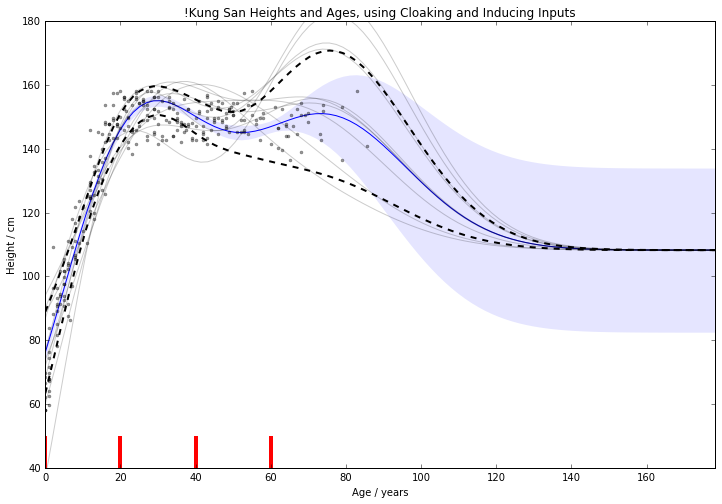

In [34]:
from sklearn.cluster import KMeans

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
#model = GPy.models.GPRegression(X,y,kern,normalizer=None)
inducinglocs = m = KMeans(n_clusters=4, random_state=0).fit(X).cluster_centers_
inducinglocs = np.array([[0,20,40,60]]).T
model = GPy.models.SparseGPRegression(X,y,kern,normalizer=None,Z=inducinglocs)
model.Gaussian_noise = 0.3

dpgp = dp4gp.DPGP_inducing_cloaking(model,ac_sens,epsilon,delta)
Xtest = np.arange(-40,140,3)[:,None]

plt.figure(figsize=[12,8])
plt.ylim([40,180])
dpgp.plot(plot_data = True,extent_lower={0:0},extent_upper={0:180},Nits=100,ys_mean=ysub,ys_std=ys_std,confidencescale=[1.0])
plt.vlines(inducinglocs,40,50,colors='red',linewidth=4)
plt.savefig('inducing_cloaking.pdf')
plt.xlabel('Age / years')
plt.ylabel('Height / cm')
plt.title('!Kung San Heights and Ages, using Cloaking and Inducing Inputs')

# Main Development of Cross-Validation System

To do:
- handle normalisation
- handle hyperparameter selection (with DP)
- ...



In [44]:
# http://scikit-learn.org/stable/developers/contributing.html#estimators

from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.cluster import KMeans

class DPCloaking(BaseEstimator):
    def __init__(self, kern=None, sensitivity=1.0, epsilon=1.0, delta=0.01, inducing=None):
        """
        kern = a GPy kernel, Default: uses a default 1d RBF kernel, with default hyperparameters if not specified.
        inducing = locations of inducing points, default to None - not using inducing points.
        """
        self.kern = kern
        self.sensitivity = sensitivity
        self.epsilon = epsilon
        self.delta = delta
        self.inducing = inducing
        
    def fit(self, X, y, **kwargs):    
        if self.kern is None:
            self.kern = GPy.kern.RBF(1.0)
        
        
        if self.inducing is None:
            self.model = GPy.models.GPRegression(X,y,kern,normalizer=None)
            self.dpgp = dp4gp.DPGP_cloaking(self.model,self.sensitivity,self.epsilon,self.delta)
        else:
            if isinstance(self.inducing, list):
                inducinglocs = self.inducing
            else:
                inducinglocs = KMeans(n_clusters=self.inducing, random_state=0).fit(X).cluster_centers_
            self.model = GPy.models.SparseGPRegression(X,y,kern,normalizer=None,Z=inducinglocs)
            self.dpgp = dp4gp.DPGP_inducing_cloaking(self.model,self.sensitivity,self.epsilon,self.delta)
        return self

    def predict(self, X, Nattempts=2, Nits=100):
        ypred,_,_= self.dpgp.draw_prediction_samples(X,Nattempts=Nattempts,Nits=Nits)
        return ypred
    
#    def get_params(self, deep=True):
#        return {"kern": self.kern, "sensitivity":self.sensitivity, "epsilon":self.epsilon, "delta":self.delta}

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
#scores_inducing = cross_val_score(DPCloaking(sensitivity=ac_sens,kern=kern.copy(),inducing = np.array([[0.0,20.0,40,50.0]]).T),X,y,scoring='neg_mean_squared_error',cv = 10)
scores_inducing = cross_val_score(DPCloaking(sensitivity=ac_sens,kern=kern.copy(),inducing = 4),X,y,scoring='neg_mean_squared_error',cv = 10)
#scores_inducing = {}
#for Nind in [1,5,25]:
#    scores_inducing[Nind] = cross_val_score(DPCloaking(sensitivity=ac_sens,kern=kern.copy(),inducing = 25),X,y,scoring='neg_mean_squared_error',cv = 10)

kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
scores_normal = cross_val_score(DPCloaking(sensitivity=ac_sens,kern=kern.copy()),X,y,scoring='neg_mean_squared_error',cv = 10)

[[  6.08860759]
 [ 42.79027778]
 [ 65.86176471]
 [ 22.81780822]]
(29, 258)
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Stopped before convergence
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Stopped before convergence
(3.8846795501345945, 3.2552472614374586, array([[ 1.62119118]]), 1.0, 0.0)
[[  5.87820513]
 [ 42.30735294]
 [ 65.42162162]
 [ 22.796     ]]
(29, 258)
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . Stopped before convergence
*
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [45]:
rmse_normal = ys_std*np.sqrt(-np.array(scores_normal))
rmse_inducing = ys_std*np.sqrt(-scores_inducing)

In [46]:
print np.mean(rmse_normal), np.std(rmse_normal)/np.sqrt(len(rmse_normal))

14.9453681475 2.03945135648


In [47]:
print np.mean(rmse_inducing), np.std(rmse_inducing)/np.sqrt(len(rmse_inducing))

11.0776299046 0.753066026766


In [19]:
m = KMeans(n_clusters=3, random_state=0).fit(np.array([[1,2,3,5,6,7,9,10,11]]).T).cluster_centers_

In [4]:
scores

array([-0.08616311, -0.101673  , -0.56479301])

In [5]:
ys_std**2 *-scores #MSE
np.sqrt(ys_std**2 *-scores) #RMSE

array([  7.55623567,   8.20819422,  19.34592304])

In [ ]:
def generate_model(Xtrain,ytrain):
    kern = GPy.kern.RBF(1.0,lengthscale=25.0,variance=1.0)
    model = GPy.models.SparseGPRegression(Xtrain,ytrain,kern,normalizer=None,Z=np.array([[0.0,20.0,40,50.0]]).T)
    return model

nblocks = 5
perm = np.random.permutation(len(X))
blocksize = int(np.ceil(len(X)/float(nblocks)))
for block in range(0,len(X),blocksize):
    if block+blocksize>=len(X): #if last block to test
        blocksize = len(X)-block
    testIndices = perm[block:(block+blocksize)]
    Xtest = X[testIndices,:]
    ytest = y[testIndices]
    Xtrain = np.delete(X,testIndices,0)
    ytrain = np.delete(y,testIndices,0)
    model = generate_model(Xtrain,ytrain)
    dpgp = dp4gp.DPGP_cloaking(model,ac_sens,epsilon,delta)
    ypred,_,_= dpgp.draw_prediction_samples(Xtest,Nattempts=1,Nits=100)

In [ ]:
ypred - ytest

In [ ]:
temp = np.array([[0.844,0.8839],[0.8917,0.9339],[0.9373,0.9816],[0.98,1.0264],[1.0195,1.0677],[1.055,1.105],[1.0862,1.1376],[1.1125,1.1651],[1.1335,1.1871],[1.1489,1.2033],[1.1586,1.2134],[1.1622,1.2172],[1.1599,1.2148],[1.1516,1.2061],[1.1374,1.1912],[1.1176,1.1705],[1.0925,1.1442],[1.0624,1.1126],[1.0277,1.0764],[0.9891,1.0359],[0.947,0.9918],[0.902,0.9447],[0.8547,0.8952],[0.8057,0.8439],[0.7556,0.7914],[0.705,0.7383],[0.6543,0.6852],[0.6041,0.6327],[0.5549,0.5812],[0.5071,0.5311],[0.461,0.4828],[0.4169,0.4366],[0.3751,0.3928],[0.3357,0.3516],[0.2989,0.3131],[0.2648,0.2773],[0.2333,0.2444],[0.2046,0.2142],[0.1784,0.1869],[0.1548,0.1621],[0.1336,0.1399],[0.1147,0.1202],[0.098,0.1026],[0.0833,0.0872],[0.0704,0.0737],[0.0592,0.062],[0.0496,0.0519],[0.0412,0.0432],[0.0342,0.0358],[0.0281,0.0295],[0.0231,0.0242],[0.0188,0.0197],[0.0152,0.016],[0.0123,0.0129],[0.0099,0.0103],[0.0079,0.0083],[0.0063,0.0066],[0.005,0.0052],[0.0039,0.0041],[0.003,0.0032],[0.0024,0.0025],[0.0018,0.0019],[0.0014,0.0015],[0.0011,0.0011],[0.0008,0.0009],[0.0006,0.0007],[0.0005,0.0005],[0.0004,0.0004],[0.0003,0.0003],[0.0002,0.0002],[0.0001,0.0002],[0.0001,0.0001],[0.0001,0.0001],[0.0001,0.0001],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.]])

In [ ]:
plt.plot(temp)